In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Next, let's load the data into a DataFrame and perform some basic data cleaning:

python


In [52]:
# Load data from CSV file into a DataFrame
data = pd.read_csv('Netflix_userbase.csv')


In [53]:
# Convert Join Date and Last Payment Date to datetime format
data['Join Date'] = pd.to_datetime(data['Join Date'])
data['Last Payment Date'] = pd.to_datetime(data['Last Payment Date'])


In [54]:
# Check for missing values
print(data.isnull().sum())

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64


In [55]:

# Drop rows with missing values (if any)
data.dropna(inplace=True)

In [56]:

# Print the basic information about the data
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   User ID            2500 non-null   int64         
 1   Subscription Type  2500 non-null   object        
 2   Monthly Revenue    2500 non-null   int64         
 3   Join Date          2500 non-null   datetime64[ns]
 4   Last Payment Date  2500 non-null   datetime64[ns]
 5   Country            2500 non-null   object        
 6   Age                2500 non-null   int64         
 7   Gender             2500 non-null   object        
 8   Device             2500 non-null   object        
 9   Plan Duration      2500 non-null   object        
dtypes: datetime64[ns](2), int64(3), object(5)
memory usage: 195.4+ KB
None


In [57]:

# Display the first few rows of the cleaned data
print(data.head())

   User ID Subscription Type  Monthly Revenue  Join Date Last Payment Date  \
0        1             Basic               10 2022-01-15        2023-10-06   
1        2           Premium               15 2021-05-09        2023-06-22   
2        3          Standard               12 2023-02-28        2023-06-27   
3        4          Standard               12 2022-10-07        2023-06-26   
4        5             Basic               10 2023-01-05        2023-06-28   

          Country  Age  Gender      Device Plan Duration  
0   United States   28    Male  Smartphone       1 Month  
1          Canada   35  Female      Tablet       1 Month  
2  United Kingdom   42    Male    Smart TV       1 Month  
3       Australia   51  Female      Laptop       1 Month  
4         Germany   33    Male  Smartphone       1 Month  


Now that the data is cleaned, We'll proceed with exploratory data analysis (EDA) and visualization:In the below code, we will perform various visualizations to gain insights into the Netflix database. I will visualized the distribution of Subscription Type, Monthly Revenue, Age, Gender, Country, Device, and Plan Duration. Additionally, we will creat a correlation heatmap to understand the relationships between numeric columns.

In [58]:
# Summary statistics
print(data.describe())



          User ID  Monthly Revenue          Age
count  2500.00000      2500.000000  2500.000000
mean   1250.50000        12.508400    38.795600
std     721.83216         1.686851     7.171778
min       1.00000        10.000000    26.000000
25%     625.75000        11.000000    32.000000
50%    1250.50000        12.000000    39.000000
75%    1875.25000        14.000000    45.000000
max    2500.00000        15.000000    51.000000


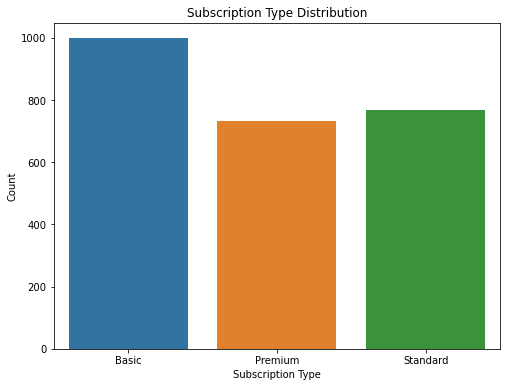

In [59]:
# EDA: Subscription Type distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Subscription Type', data=data)
plt.title('Subscription Type Distribution')
plt.xlabel('Subscription Type')
plt.ylabel('Count')
plt.show()



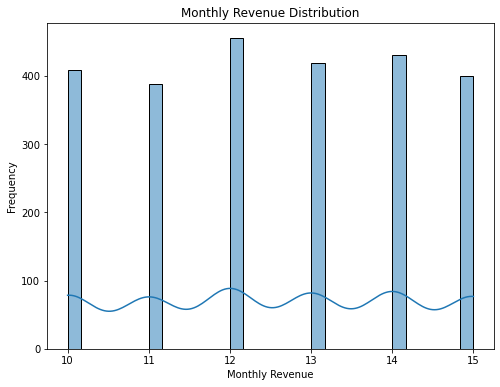

In [60]:
# EDA: Monthly Revenue distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['Monthly Revenue'], kde=True, bins=30)
plt.title('Monthly Revenue Distribution')
plt.xlabel('Monthly Revenue')
plt.ylabel('Frequency')
plt.show()



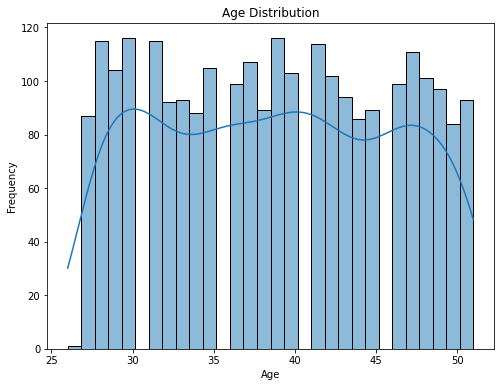

In [61]:
# EDA: Age distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


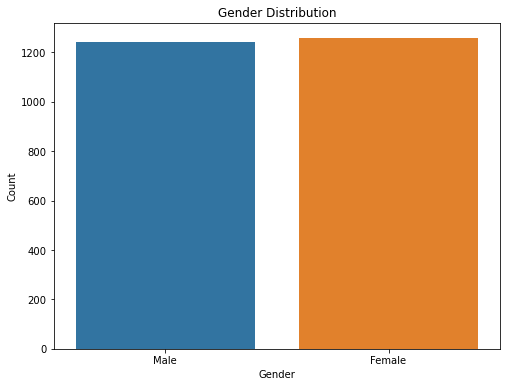

In [62]:

# EDA: Gender distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=data)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()



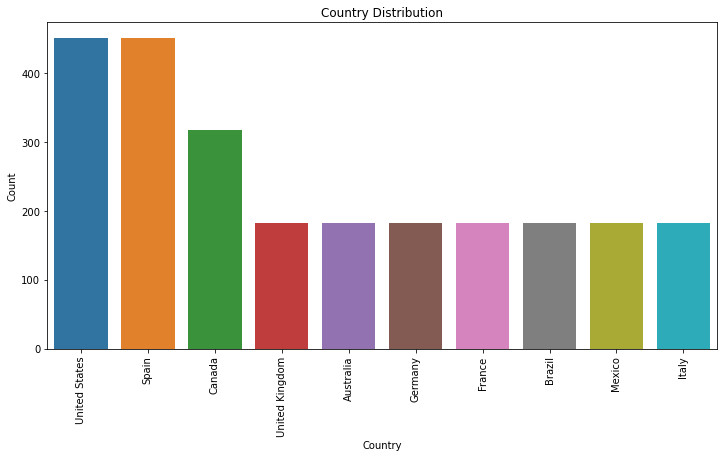

In [63]:
# EDA: Country distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='Country', data=data, order=data['Country'].value_counts().index)
plt.title('Country Distribution')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()



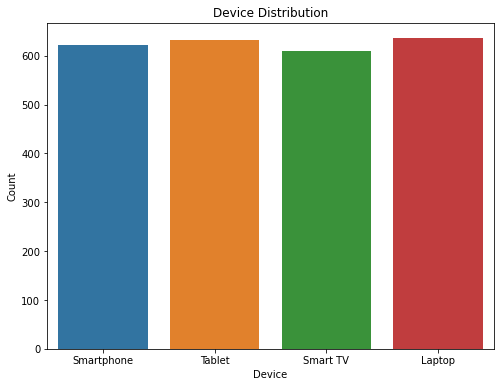

In [64]:
# EDA: Device distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Device', data=data)
plt.title('Device Distribution')
plt.xlabel('Device')
plt.ylabel('Count')
plt.show()


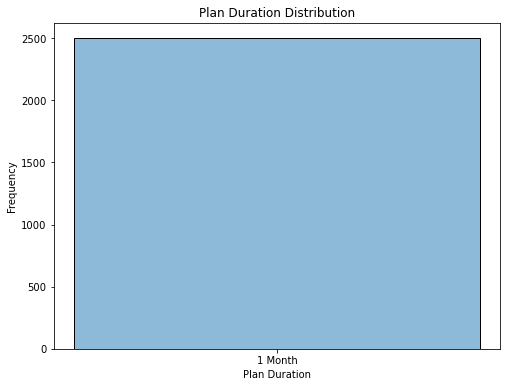

In [65]:

# EDA: Plan Duration distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['Plan Duration'], kde=True, bins=30)
plt.title('Plan Duration Distribution')
plt.xlabel('Plan Duration')
plt.ylabel('Frequency')
plt.show()


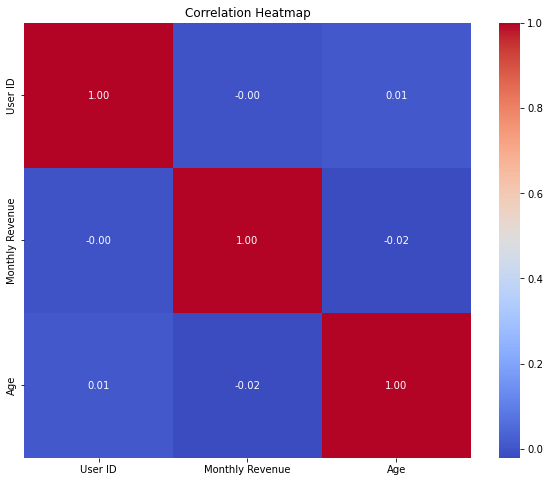

In [66]:

# EDA: Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [68]:

# Convert categorical variables to numerical using one-hot encoding
data = pd.get_dummies(data, columns=['Subscription Type', 'Country', 'Gender', 'Device'])



In [69]:
# Mapping for Plan Duration
duration_mapping = {
    '1 Month': 1,
    '3 Months': 3,
    '6 Months': 6,
    '12 Months': 12
}

data['Plan Duration'] = data['Plan Duration'].map(duration_mapping)

In [70]:

# Separate target variable (Monthly Revenue) from features
X = data.drop(['User ID', 'Monthly Revenue', 'Join Date', 'Last Payment Date'], axis=1)
y = data['Monthly Revenue']





In [71]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [72]:

# Create a linear regression model
model = LinearRegression()



In [73]:
# Fit the model on the training data
model.fit(X_train, y_train)



LinearRegression()

In [74]:
# Make predictions on the test data
y_pred = model.predict(X_test)


In [75]:

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R2): {r2:.2f}')


Mean Squared Error (MSE): 2.82
R-squared (R2): -0.02


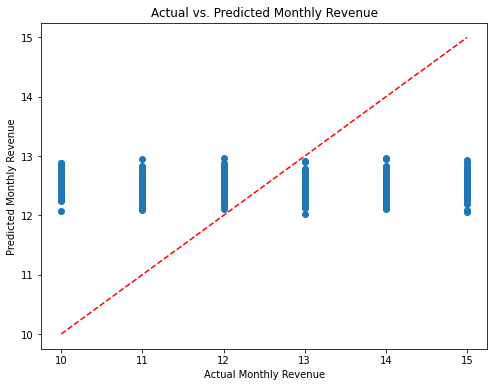

In [76]:

# Visualize the predicted values vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Actual Monthly Revenue')
plt.ylabel('Predicted Monthly Revenue')
plt.title('Actual vs. Predicted Monthly Revenue')
plt.show()


In the above code, we first preprocessed the data by converting categorical variables to numerical using one-hot encoding. Then, we split the data into training and testing sets. We created a linear regression model, trained it on the training data, and made predictions on the test data. Finally, we evaluated the model's performance using Mean Squared Error (MSE) and R-squared (R2) and visualized the predicted values against the actual values.
